In [1]:
import h5py
print(h5py.__version__)

3.15.1


In [2]:
from phi.flow import *

In [3]:
v = StaggeredGrid(
    values= lambda pos:vec(
        x=math.cos(pos).vector["x"] * math.sin(pos).vector["y"],
        y=math.sin(pos).vector["x"] * math.cos(pos).vector["y"],
    ),
    extrapolation=extrapolation.PERIODIC,
    x=25,
    y=25,
    bounds=Box(x=2*PI, y=2*PI),
)

In [4]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")

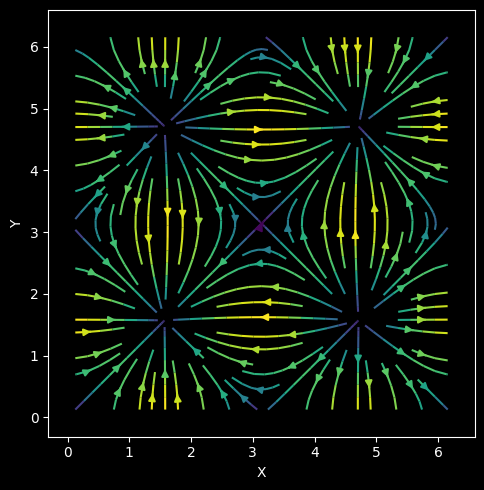

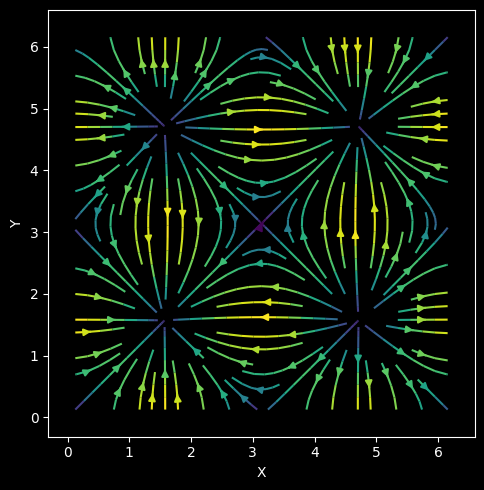

In [5]:
plot(v)

In [6]:
def make_step(v, dt=0.5):
    v = advect.semi_lagrangian(v, v, dt=dt)
    v = diffuse.implicit(v, 0.1, dt)
    v, _ = fluid.make_incompressible(v)
    return v

In [7]:
trj = iterate(make_step, batch(time=20), v)

/Users/v1macbookair/MobileApp/untitled_folder/elasticsearch/elastic_search/lib/python3.12/site-packages/phiml/backend/_linalg.py:345: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  x = spsolve(lin[batch], y[batch])  # returns nan when diverges


In [8]:
plot(trj, animate="time", size=(5, 5))

<Figure size 640x480 with 0 Axes>